# Fuel Economy - Stepwise Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

sns.set_style("whitegrid")

Load data.

In [2]:
car_data = pd.read_excel("./data/carEcon.xlsx", sheet_name='carData', dtype={'Drive': str})
car_test = pd.read_excel("./data/carEcon.xlsx", sheet_name='carTest', dtype={'Drive': str})
X_test, y_test = car_test.iloc[:, :-1], car_test.iloc[:, -1]
car_train = pd.read_excel("./data/carEcon.xlsx", sheet_name='carTrain', dtype={'Drive': str})
X_train, y_train = car_train.iloc[:, :-1], car_train.iloc[:, -1]
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
car_data.head()

,Car_Truck,EngDisp,RatedHP,Transmission,Drive,Weight,Comp,AxleRatio,EVSpeedRatio,AC,PRP,FuelType,City_Highway,Valves_Cyl,FuelEcon
0,truck,4.1623,350,L6,4,2721.6,12.5,4.32,35.9,N,1,61,city,8,15.6810
1,car,2.4745,150,L6,F,1530.9,9.5,3.50,32.7,N,31,61,highway,5,6.0622
2,car,2.4417,168,L5,F,1757.7,10.3,2.44,34.6,N,31,23,highway,5,6.2724
3,truck,2.2942,133,AV,4,1814.4,12.3,3.73,31.2,Y,31,61,city,4,6.5702
4,truck,3.3102,208,AV,4,2154.6,10.8,3.54,23.7,N,31,61,highway,6,6.7397


Encode categorical columns.

In [3]:
encoder = OneHotEncoder(drop='if_binary')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns]).toarray()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out())
X_train_encoded = pd.concat((X_train[numeric_columns], X_train_encoded), axis=1)
X_train_encoded.head()

,EngDisp,RatedHP,Weight,Comp,AxleRatio,EVSpeedRatio,PRP,FuelType,Valves_Cyl,Car_Truck_truck,...,Transmission_M6,Transmission_S4,Transmission_S5,Transmission_S6,Transmission_S7,Drive_4,Drive_F,Drive_R,AC_Y,City_Highway_highway
0,1.6059,110,1304.1,10.0,4.04,42.0,1,61,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.9992,150,1417.5,10.0,3.68,37.6,31,61,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.9992,150,1417.5,10.0,3.68,37.4,31,61,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.3597,158,1644.3,9.8,3.39,31.9,31,61,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.2942,160,1587.6,9.7,3.86,36.3,31,61,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Stepwise

In [4]:
regressor = sm.OLS(y_train, X_train_encoded)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelEcon   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     79.17
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          1.30e-141
Time:                        23:44:39   Log-Likelihood:                -675.42
No. Observations:                 408   AIC:                             1411.
Df Residuals:                     378   BIC:                             1531.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
EngDisp                  0.1950      0.193      1.008      0.314      -0.185       0.575
RatedHP                  0.0066      0.002      3.674      0.000       0.003       0.010
Weight                   0.0011      0.000      2.872      0.004       0.000       0.002
Comp                    -0.2764      0.068     -4.037      0.000      -0.411      -0.142
AxleRatio                0.3187      0.185      1.727      0.085      -0.044       0.682
EVSpeedRatio            -0.0241      0.021     -1.162      0.246      -0.065       0.017
PRP                      0.0155      0.006      2.497      0.013       0.003       0.028
FuelType                -0.0232      0.006     -4.130      0.000      -0.034      -0.012
Valves_Cyl               0.4539      0.111      4.088      0.000       0.236       0.672
Car_Truck_truck          0.6322      0.228      2.768      0.006       0.183       1.081
Transmission_A4          1.6992      1.297      1.310      0.191      -0.851       4.249
Transmission_A6          2.2900      0.978      2.341      0.020       0.366       4.214
Transmission_AV          0.0673      0.533      0.126      0.900      -0.980       1.114
Transmission_C6          1.8045      1.292      1.396      0.163      -0.737       4.346
Transmission_L4          1.6456      0.286      5.745      0.000       1.082       2.209
Transmission_L5          1.7760      0.274      6.480      0.000       1.237       2.315
Transmission_L6          0.7952      0.287      2.766      0.006       0.230       1.360
Transmission_L7          1.0196      0.465      2.193      0.029       0.105       1.934
Transmission_L8         -0.6215      0.777     -0.800      0.424      -2.148       0.906
Transmission_M4          0.2354      1.308      0.180      0.857      -2.336       2.807
Transmission_M5          1.2064      0.350      3.444      0.001       0.518       1.895
Transmission_M6          1.7496      0.304      5.750      0.000       1.151       2.348
Transmission_S4          1.0540      0.676      1.559      0.120      -0.276       2.384
Transmission_S5          1.3711      0.463      2.962      0.003       0.461       2.281
Transmission_S6          1.6841      0.399      4.216      0.000       0.899       2.470
Transmission_S7          1.7801      0.749      2.377      0.018       0.308       3.253
Drive_4                  7.0892      1.061      6.681      0.000       5.003       9.176
Drive_F                  5.9261      0.998      5.936      0.000       3.963       7.889
Drive_R                  6.5414      1.052      6.216      0.000       4.472       8.611
AC_Y                     0.6107      0.170      3.599      0.000       0.277       0.944
City_Highway_highway    -4.6163      0.138    -33.562      0.000      -4.887      -4.346
=========================================================

In [5]:
X_train_encoded.drop(columns=['EngDisp', 'EVSpeedRatio', 'Transmission_A4', 'Transmission_AV', 'Transmission_C6', 'Transmission_L8', 
                           'Transmission_M4', 'Transmission_S4'], inplace=True)

regressor = sm.OLS(y_train, X_train_encoded)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelEcon   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          1.03e-146
Time:                        23:44:39   Log-Likelihood:                -679.92
No. Observations:                 408   AIC:                             1406.
Df Residuals:                     385   BIC:                             1498.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RatedHP                  0.0069      0.002      3.966      0.000       0.003       0.010
Weight                   0.0013      0.000      3.966      0.000       0.001       0.002
Comp                    -0.3136      0.067     -4.713      0.000      -0.444      -0.183
AxleRatio                0.1729      0.150      1.153      0.250      -0.122       0.468
PRP                      0.0159      0.006      2.607      0.009       0.004       0.028
FuelType                -0.0230      0.006     -4.147      0.000      -0.034      -0.012
Valves_Cyl               0.5453      0.093      5.873      0.000       0.363       0.728
Car_Truck_truck          0.7483      0.221      3.393      0.001       0.315       1.182
Transmission_A6          1.7025      1.022      1.666      0.096      -0.306       3.711
Transmission_L4          1.2146      0.343      3.540      0.000       0.540       1.889
Transmission_L5          1.3115      0.341      3.849      0.000       0.641       1.981
Transmission_L6          0.3533      0.346      1.020      0.309      -0.328       1.034
Transmission_L7          0.6109      0.520      1.176      0.240      -0.411       1.633
Transmission_M5          0.6607      0.398      1.658      0.098      -0.123       1.444
Transmission_M6          1.2626      0.370      3.409      0.001       0.534       1.991
Transmission_S5          0.7880      0.524      1.504      0.133      -0.242       1.818
Transmission_S6          1.2452      0.460      2.706      0.007       0.340       2.150
Transmission_S7          1.2708      0.774      1.642      0.101      -0.251       2.792
Drive_4                  7.2462      1.184      6.122      0.000       4.919       9.573
Drive_F                  6.0817      1.123      5.417      0.000       3.874       8.289
Drive_R                  6.7367      1.178      5.721      0.000       4.421       9.052
AC_Y                     0.5570      0.163      3.418      0.001       0.237       0.877
City_Highway_highway    -4.6188      0.137    -33.767      0.000      -4.888      -4.350
==============================================================================
Omnibus:                      103.881   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.434
Skew:                           1.163   Prob(JB):                     7.13e-70
Kurtosis:                       6.649   Cond. No.                     6.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X_train_encoded.drop(columns=['AxleRatio', 'Transmission_L6', 'Transmission_L7', 'Transmission_S5', 'Transmission_S7'], inplace=True)

regressor = sm.OLS(y_train, X_train_encoded)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelEcon   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          6.65e-151
Time:                        23:44:40   Log-Likelihood:                -682.46
No. Observations:                 408   AIC:                             1401.
Df Residuals:                     390   BIC:                             1473.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RatedHP                  0.0076      0.002      4.570      0.000       0.004       0.011
Weight                   0.0012      0.000      3.890      0.000       0.001       0.002
Comp                    -0.2899      0.064     -4.519      0.000      -0.416      -0.164
PRP                      0.0163      0.006      2.720      0.007       0.005       0.028
FuelType                -0.0220      0.005     -4.011      0.000      -0.033      -0.011
Valves_Cyl               0.5075      0.091      5.590      0.000       0.329       0.686
Car_Truck_truck          0.7908      0.216      3.656      0.000       0.366       1.216
Transmission_A6          1.3918      0.979      1.421      0.156      -0.534       3.317
Transmission_L4          0.8630      0.202      4.268      0.000       0.465       1.260
Transmission_L5          0.9520      0.194      4.920      0.000       0.572       1.332
Transmission_M5          0.3323      0.298      1.115      0.266      -0.254       0.918
Transmission_M6          0.8729      0.241      3.617      0.000       0.398       1.347
Transmission_S6          0.8267      0.358      2.308      0.021       0.123       1.531
Drive_4                  8.0388      0.998      8.057      0.000       6.077      10.000
Drive_F                  6.8390      0.943      7.254      0.000       4.985       8.693
Drive_R                  7.5074      1.009      7.438      0.000       5.523       9.492
AC_Y                     0.5916      0.159      3.729      0.000       0.280       0.903
City_Highway_highway    -4.6184      0.136    -33.873      0.000      -4.886      -4.350
==============================================================================
Omnibus:                      101.471   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.572
Skew:                           1.150   Prob(JB):                     8.89e-66
Kurtosis:                       6.512   Cond. No.                     5.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X_train_encoded.drop(columns=['Transmission_A6', 'Transmission_M5'], inplace=True)

regressor = sm.OLS(y_train, X_train_encoded)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelEcon   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          2.21e-152
Time:                        23:44:40   Log-Likelihood:                -684.16
No. Observations:                 408   AIC:                             1400.
Df Residuals:                     392   BIC:                             1465.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RatedHP                  0.0074      0.002      4.453      0.000       0.004       0.011
Weight                   0.0011      0.000      3.592      0.000       0.001       0.002
Comp                    -0.3023      0.063     -4.764      0.000      -0.427      -0.178
PRP                      0.0167      0.006      2.793      0.005       0.005       0.029
FuelType                -0.0222      0.005     -4.032      0.000      -0.033      -0.011
Valves_Cyl               0.5248      0.089      5.895      0.000       0.350       0.700
Car_Truck_truck          0.8144      0.215      3.790      0.000       0.392       1.237
Transmission_L4          0.7814      0.191      4.081      0.000       0.405       1.158
Transmission_L5          0.8645      0.182      4.741      0.000       0.506       1.223
Transmission_M6          0.7731      0.231      3.349      0.001       0.319       1.227
Transmission_S6          0.7172      0.353      2.030      0.043       0.023       1.412
Drive_4                  8.4165      0.944      8.913      0.000       6.560      10.273
Drive_F                  7.1880      0.895      8.031      0.000       5.428       8.948
Drive_R                  7.8992      0.955      8.274      0.000       6.022       9.776
AC_Y                     0.5921      0.159      3.730      0.000       0.280       0.904
City_Highway_highway    -4.6108      0.136    -33.780      0.000      -4.879      -4.342
==============================================================================
Omnibus:                      103.833   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.230
Skew:                           1.178   Prob(JB):                     3.18e-67
Kurtosis:                       6.530   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Fit HuberRegressor with reduced X_train.

In [8]:
regressor = HuberRegressor(max_iter=10000)
regressor.fit(X_train_encoded, y_train)

HuberRegressor(max_iter=10000)

In [9]:
X_test_encoded = encoder.transform(X_test[categorical_columns]).toarray()
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out())
X_test_encoded = pd.concat((X_test[numeric_columns], X_test_encoded), axis=1)[X_train_encoded.columns]

y_pred = regressor.predict(X_test_encoded)
print("R^2:", regressor.score(X_test_encoded, y_test))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R^2: 0.7370049177253719
RMSE: 1.18982148987378


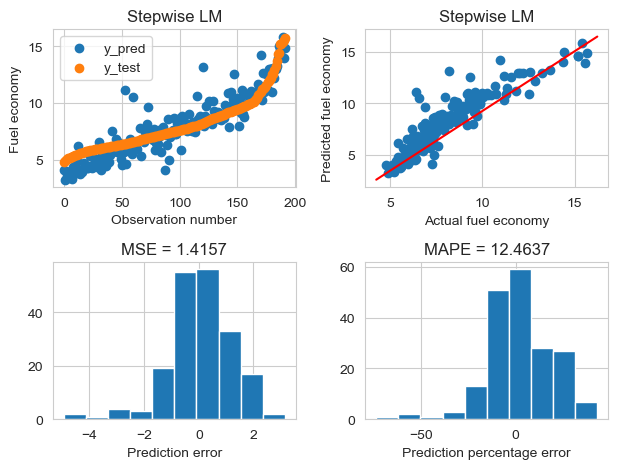

In [10]:
fig, axs = plt.subplots(2, 2)

# Plot against observation number
axs[0, 0].scatter(range(len(y_pred)), y_pred)
axs[0, 0].scatter(range(len(y_test)), y_test)
axs[0, 0].set_xlabel('Observation number')
axs[0, 0].set_ylabel('Fuel economy')
axs[0, 0].legend(["y_pred", "y_test"])
axs[0, 0].set_title("Stepwise LM")

# Plot predicted and actual against each other
axs[0, 1].scatter(y_test, y_pred)
xlim = axs[0, 1].get_xlim()
ylim = axs[0, 1].get_ylim()
axs[0, 1].plot(xlim, ylim, color='r')
axs[0, 1].set_xlabel('Actual fuel economy')
axs[0, 1].set_ylabel('Predicted fuel economy')
axs[0, 1].set_title("Stepwise LM")

# Distribution of errors
error = y_test - y_pred
MSE = np.mean(error**2)
axs[1, 0].hist(error)
axs[1, 0].set_title('MSE = {:.4f}'.format(MSE))
axs[1, 0].set_xlabel('Prediction error')

# Distribution of percentage errors
error = 100 * error / y_test
MSE = np.mean(np.abs(error))
axs[1, 1].hist(error)
axs[1, 1].set_title('MAPE = {:.4f}'.format(MSE))
axs[1, 1].set_xlabel('Prediction percentage error')

plt.tight_layout()
plt.show()